# What is Gradient Descent?

In ML, Gradient Descent is an optimization technique used for computing the model parameters (coefficient and intercept) for algorithm like **Linear Regression, Logistic Regression, Neural Network** etc.

In this technique, we repeatedly iterate through the training set and update the model parameters in accordance with the gradient (Partial Derivate of Cost Function) of the error with respect to the training set.

We have 3-types of gradient descents, depending upon the number of training examples considered in updating the model parameters:

- **Batch Gradient Descent:** Paremeters are updated after computing the gradient of the error with respect to the entire training set.
- **Sochastic Gradient Descent:** Parameters are updated after computing the gradient of the error with respect to a single training example.
- **Mini-Batch Gradient Descent:** Parameters are updated after computing the gradient of the error with respect to a subset of the training set.

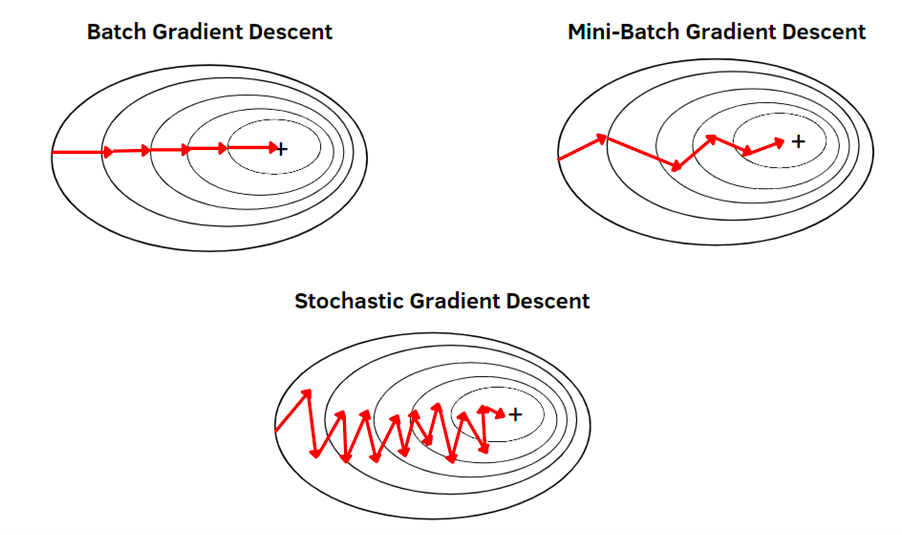

### Mini Batch Gradient Descent(MBGD):

In MBGD, instead of using the entire training dataset(Batch Gradient Descent) or just a single randomly choosen data point (stochastic Gradient Descent), the algorithm updates the model parameters using a small, randomly selected subset or "mini-batch" of the training data in each iteration.

Here are the key characteristics of Mini-Batch Gradient Descent: 

### Batch Size:

- It is a hyperparameter that determines the number of training examples used in a each iteration to update the model parameters.
- Typical batch sizes are small, such as 32, 64 or 128, but this can vary based on the dataset and computational resources. 

### Iterations:

The training process involves multiple epochs, where each epoch consists of going through the entire batched dataset once. 

### Convergence:

- Due to the randomness introduced by the mini-batch selection, MBGD may exhibit more oscillations in the cost function compared to Batch Gradient Descent.
- However, this randomness often helps MBGD escape local minima and can lead to faster convergence.

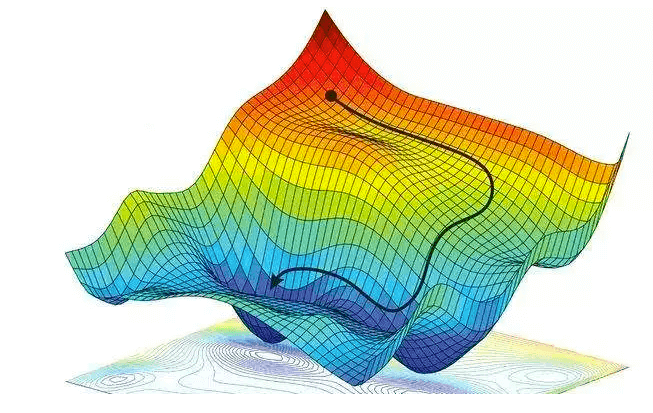

### Learning Rate:

- The learning rate(step size) is a hyperparameter that controls the size of the steps taken in the parameter space during optimization.
- It needs to be carefully choosen, and techniques like learning rate schedules may be applied.

Let's proceed to build to approximation class that will assist us in determining the beta values(coefficient and intercept) using Mini-Batch Gradient Descent for out Multiple Linear Regression Model. Usin the diabetes dataset to create our own MGBDRegressor and validate it aganist Sklearn's SGDRegressor.

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
import random
import numpy as np

In [5]:
(inputs, target)= load_diabetes(return_X_y= True)

In [6]:
print("Input shape:", inputs.shape)
print("Target shape:", target.shape)

Input shape: (442, 10)
Target shape: (442,)


In [7]:
train_inputs, test_inputs, train_target, test_target= train_test_split(inputs, target, test_size=0.2, random_state=42)

In [8]:
print("train_inputs:", train_inputs)
print("\n")
print("train_shape:", train_inputs.shape)

train_inputs: [[ 0.07076875  0.05068012  0.01211685 ...  0.03430886  0.02736405
  -0.0010777 ]
 [-0.00914709  0.05068012 -0.01806189 ...  0.07120998  0.00027248
   0.01963284]
 [ 0.00538306 -0.04464164  0.04984027 ... -0.00259226  0.01703607
  -0.01350402]
 ...
 [ 0.03081083 -0.04464164 -0.02021751 ... -0.03949338 -0.01090325
  -0.0010777 ]
 [-0.01277963 -0.04464164 -0.02345095 ... -0.00259226 -0.03845972
  -0.03835666]
 [-0.09269548 -0.04464164  0.02828403 ... -0.03949338 -0.00514219
  -0.0010777 ]]


train_shape: (353, 10)


**Note: Data Preprocessing:** Ensure the data preprocessing steps, such as normalization or standardization, must be perform. Discrepancies in data preprocessing can impact model convergence.

Here's, I'm not applying DataStandardization because the datasets is already in Similiar Range of all the axis.

Since, Mini-Batch Gradient Descent requires the value of Learning Rate and Epochs. I am first applying the sklearn's StochasticGradientDescent for better implementation of our model.

In [9]:
reg= SGDRegressor(learning_rate= "constant", eta0=0.05)

In [10]:
batch_size= 32

#max_features= 500
for i in range(500):
    idx= random.sample(range(train_inputs.shape[0]), batch_size)
    reg.partial_fit(train_inputs[idx], train_target[idx])

In [11]:
reg.coef_

array([  40.79855987, -180.74912032,  483.38649415,  320.53848222,
        -59.57284799, -102.09062696, -212.86523683,  148.78232022,
        350.76913136,  131.73767231])

In [12]:
reg.intercept_

array([160.83325203])

In [13]:
y_pred= reg.predict(test_inputs)

In [14]:
r2_score(test_target, y_pred)

0.453712399415093

Now it's implement our custom class

### Mini-Batch Gradient Descent Algorithm:

1. **Initialize Parameters:** Randomly initializing the parameters include coefficients for features and an intercept terms, for the model with some predefined values.
2. **Batch Size:** Divide the entire training data into mini-batches, which reppresents the number of training examples used in each iteration of the algorithm.
3. **Gradient Computation Parameter Update:**

       a. Iterate over each randomly selected training example from the training all the mini-batches dataset to introduce randomness.
       b. Compute the gradient of the cost function with respect to the model parameters using the examples in the mini-batch.
       c. Update the model parameters based on the computed gradient and a predefined learning rate.
4. **Convergence Check:** Once the convergence criteria are met or the maximum number of iterations is reached, return the optimised model parameters


Once the algorithm completes all epochs, the model parameters are considered optimized and can be used for making predictions on new, unseen data.

In [30]:
class MGBDRegressor():

    def __init__(self, learning_rate= 0.01, epochs= 200, batch_size= 32):
        self.coeff= None
        self.intcpt= None
        self.learning_rate= learning_rate
        self.epoch= epochs
        self.batch_size= batch_size
    # Creating 'fit' function
    def fit(self, train_inputs, train_target):
        #In multiple Linear Regression, it is advisable to choose the starting point of intercept=0 and coefficient =1

        # Starting with initializing intercept=0
        self.intcpt=0

        # Starting with initializing coefficients= 1
        self.coeff= np.ones(train_inputs.shape[1]) # Using train_inputs.shape[1] for the number of features

        # Starting iteration loop
        for i in range(self.epoch):
            for j in range(int(train_inputs.shape[0]/self.batch_size)):

                # Fetching the index randomly
                idx= random.sample(range(train_inputs.shape[0]), self.batch_size)

                # Calculating the derivative of intercept values
                y_hat= np.dot(train_inputs[idx], self.coeff)+ self.intcpt

                intercept_derivative = -2 * np.mean(train_target[idx] - y_hat)

                # Updating all the intercept values
                self.intcpt= self.intcpt- (self.learning_rate * intercept_derivative)

                # Caluclating the derivative of intercept values
                coeff_derivate = -2 *np.dot((train_target[idx]- y_hat), train_inputs[idx])

                # Updating all the intercept values
                self.coeff= self.coeff- (self.learning_rate *coeff_derivate)


    @property
    def coefficients(self):
        if self.coeff is not None:
            return self.coeff
        else:
            print("Model not fitted yet.")


    @property
    def intercept(self):
        if self.intcpt is not None:
            return self.intcpt
        else:
            print("Model not fitted yet.")


    # Creating 'predict' Function
    def predict(self, test_inputs):
        return np.dot(test_inputs, self.coeff)+ self.intcpt


    # R2- scoring for metric evaluation
    def score(self, test_inputs, test_target):
        predictions= self.predict(test_inputs)
        r2= r2_score(test_target, predictions)
        return r2

In [31]:
mbgd= MGBDRegressor(learning_rate= 0.01, epochs= 100, batch_size= 32)

In [32]:
mbgd.fit(train_inputs, train_target)

In [33]:
mbgd.coefficients

array([  52.53447254, -172.40207754,  478.29834111,  307.36650725,
        -49.29892032,  -92.14768822, -214.22125718,  149.89149347,
        346.02687096,  126.84461543])

In [36]:
mbgd.intercept

152.1347377405905

In [37]:
r2=mbgd.score(test_inputs, test_target)

print(f"R2 score on text data: {r2}")

R2 score on text data: 0.45829754926108734


The slight difference in performance between sklearn's SGDRegressor model and my custom Mini- Batch Gradient Descent(MBGD) class implementation could be due to several factors:

1. **Randomness in Data Sampling:** My custom MBGD implementation involves randomly sampling mini-batches in each iteration. This introduces randomness and different may lead to slightly different results. The specific sample choosen in each iteration can impact the convergence of the model.

2. **Hyperparameter Tuning:** The performance of SGDRegressor in sklearn may be influenced by default hyperparameter setting, optimized for specific large dataset.

3. **Covergence Criteria:** Difference in the number of epochs and convergence criteria could contribute to performance variations between the two implementations.

4. **Learning Rate Schedule:** sklearn's SGDRegressor may include regularization terms by default, whereas my custom does not currently implement any form of regularization.


By systematically evaluation these factors, you can identify the specific reasons behind the performance difference and refines your custom MBGD implementation accordingly.

### Advantages:

- **Computational Efficiency:** MBGD is a balance between the efficiency of Batch Gradient Descent (using the entire dataset) and the faster convergence of Stochastic Gradient Descent (using only one example at a time).
- **Parallelization:** Mini-batches can be processed in parallel, leveraging hardware capabilities like GPU's.


In summary, Mini-Batch Gradient Descent combines the advantages of Batch and Stochastic Gradient Descent, Providing a computationally efficient approach suitable for large datasets. The choice of batch size is a trade off between the efficiency gained from parllel processing and the level of noise in the parameter updates.

**Note:** I have built a custom class to facilitate a better understanding of Mini-Batch Gradient Descent, Consequently, using the scikit-learn library for the development of your model.